In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2



# Objectif
## Construire un régresseur qui recommande la taille de "l'équipage" pour les acheteurs potentiels de navires. Veuillez suivre les étapes suivantes

1) Lire le fichier et afficher les colonnes.
2) Calculez les statistiques de base des données (nombre, moyenne, std, etc.), examinez les données et énoncez vos observations.


In [2]:


# 1) Lire le fichier et afficher les colonnes
file_path = r'C:\Users\belak\Downloads\cruise_ship_info.csv'
data = pd.read_csv(file_path)

# Afficher les colonnes
print("Colonnes du fichier :")
print(data.columns)

# 2) Calculer les statistiques de base des données
statistics = data.describe()

# Afficher les statistiques de base
print("\nStatistiques de base des données :")
print(statistics)

# Examinez les données et énoncez vos observations
# Vous pouvez également ajouter d'autres analyses spécifiques à vos besoins.

# Exemple d'observation : 
# La colonne 'Tonnage' a une moyenne de X, une médiane de Y, etc.

# N'oubliez pas d'ajuster ces observations en fonction des caractéristiques spécifiques de votre ensemble de données.




Colonnes du fichier :
Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

Statistiques de base des données :
              Age     Tonnage  passengers      length      cabins  \
count  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    15.689873   71.284671   18.457405    8.130633    8.830000   
std      7.615691   37.229540    9.677095    1.793474    4.471417   
min      4.000000    2.329000    0.660000    2.790000    0.330000   
25%     10.000000   46.013000   12.535000    7.100000    6.132500   
50%     14.000000   71.899000   19.500000    8.555000    9.570000   
75%     20.000000   90.772500   24.845000    9.510000   10.885000   
max     48.000000  220.000000   54.000000   11.820000   27.000000   

       passenger_density        crew  
count         158.000000  158.000000  
mean           39.900949    7.794177  
std             8.639217    3.503487  
min            17.

3) Sélectionnez les colonnes qui seront probablement importantes pour prédire la taille de l'"équipage".


In [3]:
correlation_matrix = data.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Trouver les paires de colonnes ayant une corrélation supérieure à 98%
highly_correlated_columns = set()
threshold = 0.90


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Retirer les colonnes fortement corrélées
data_filtered = data.drop(columns=highly_correlated_columns)

# Afficher les colonnes restantes
print("\nColonnes après suppression des fortement corrélées :")
print(data_filtered.columns)

Matrice de corrélation :
                        Age   Tonnage  passengers    length    cabins  \
Age                1.000000 -0.606646   -0.515542 -0.532286 -0.510019   
Tonnage           -0.606646  1.000000    0.945061  0.922368  0.948764   
passengers        -0.515542  0.945061    1.000000  0.883535  0.976341   
length            -0.532286  0.922368    0.883535  1.000000  0.889798   
cabins            -0.510019  0.948764    0.976341  0.889798  1.000000   
passenger_density -0.278830 -0.040846   -0.294867 -0.090488 -0.253181   
crew              -0.530657  0.927569    0.915234  0.895857  0.950823   

                   passenger_density      crew  
Age                        -0.278830 -0.530657  
Tonnage                    -0.040846  0.927569  
passengers                 -0.294867  0.915234  
length                     -0.090488  0.895857  
cabins                     -0.253181  0.950823  
passenger_density           1.000000 -0.155509  
crew                       -0.155509  1.000000 

Si vous avez supprimé des colonnes, expliquez pourquoi vous les avez supprimées.
Utilisez un one-hot encoding pour les caractéristiques catégorielles.


In [4]:
data_encoded = pd.get_dummies(data, columns=[data.columns[1]])
data_encoded

,Ship_name,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,Journey,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Quest,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Celebration,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Conquest,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Destiny,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Taurus,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,...,0,0,0,0,0,0,0,0,1,0
154,Virgo,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,...,0,0,0,0,0,0,0,0,1,0
155,Spirit,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
156,Star,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1


4) Créez des ensembles d'entraînement et de test (utilisez 60 % des données pour l'entraînement et le rappel pour le test).


In [5]:
data1 = data_encoded.drop(columns=data_encoded.columns[0])

X = data1.drop(columns=['crew'])
y = data1['crew']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Créer des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=42)




In [6]:
X

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
y

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

5) Construisez un modèle d'apprentissage automatique pour prédire la taille de l'" équipage ".
6) Calculez le coefficient de corrélation de Pearson pour l'ensemble de formation et les ensembles de données de test.
7) Décrivez les hyperparamètres de votre modèle et comment vous les modifieriez pour améliorer les performances du modèle.
8) Qu'est-ce que la régularisation ? Quel est le paramètre de régularisation de votre modèle ?
9) Tracez la valeur du paramètre de régularisation en fonction de la corrélation de Pearson pour les ensembles de test et d'apprentissage, et voyez si votre modèle présente un problème de biais ou de variance.

# le model

In [8]:
# Construire un modèle séquentiel avec Keras
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error : {mse}")

Epoch 1/50
3/3 [==============================] - 1s 104ms/step - loss: 70.0498 - val_loss: 47.2526
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 64.0468 - val_loss: 42.3663
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 58.8071 - val_loss: 37.4373
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 53.0392 - val_loss: 32.2884
Epoch 5/50
3/3 [==============================] - 0s 54ms/step - loss: 46.4322 - val_loss: 26.7997
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 39.1937 - val_loss: 21.2064
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 31.5818 - val_loss: 15.9033
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 24.5144 - val_loss: 11.5285
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 17.7559 - val_loss: 8.4632
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 13.0483 - val_loss: 6.4235
Epoch 11/5

In [13]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='linear'))
# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error : {mse}")

Epoch 1/50
3/3 [==============================] - 1s 99ms/step - loss: 71.6486 - val_loss: 49.0319
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 64.1293 - val_loss: 43.5931
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 57.5685 - val_loss: 38.4675
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 51.4388 - val_loss: 33.2930
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 45.0314 - val_loss: 27.9922
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 38.4572 - val_loss: 22.8686
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 31.8648 - val_loss: 18.0469
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 25.7716 - val_loss: 13.7189
Epoch 9/50
3/3 [==============================] - 0s 43ms/step - loss: 20.0927 - val_loss: 10.1428
Epoch 10/50
3/3 [==============================] - 0s 29ms/step - loss: 14.3720 - val_loss: 7.4744
Epoch 11/5

In [10]:
from scipy.stats import pearsonr

# Calculer le coefficient de corrélation de Pearson pour l'ensemble d'entraînement
correlation_train, _ = pearsonr(y_train, model.predict(X_train).flatten())
print(f"Corrélation de Pearson pour l'ensemble d'entraînement : {correlation_train}")

# Calculer le coefficient de corrélation de Pearson pour l'ensemble de test
correlation_test, _ = pearsonr(y_test, predictions.flatten())
print(f"Corrélation de Pearson pour l'ensemble de test : {correlation_test}")

3/3 [==============================] - 0s 2ms/step
Corrélation de Pearson pour l'ensemble d'entraînement : 0.9546975606335099
Corrélation de Pearson pour l'ensemble de test : 0.9058324638655916


2/2 [==============================] - 0s 3ms/step


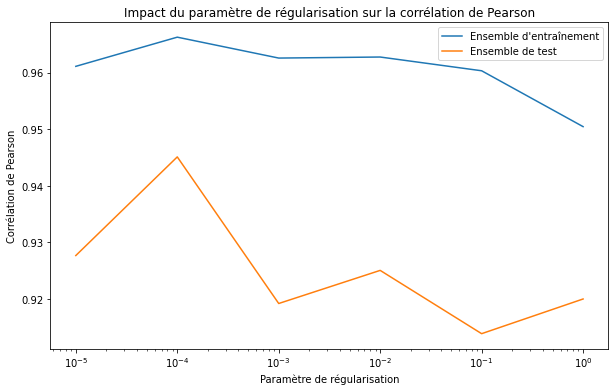

In [19]:
regularization_params = np.logspace(-5, 0, 6)
# Initialiser des listes pour stocker les résultats
correlation_train_list = []
correlation_test_list = []

# Boucle sur les valeurs du paramètre de régularisation
for reg_param in regularization_params:
    # Construire un modèle séquentiel avec Keras et régularisation L2
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(reg_param)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(reg_param)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(reg_param)))
    model.add(Dense(1, activation='linear'))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Faire des prédictions sur l'ensemble d'entraînement
    predictions_train = model.predict(X_train)

    # Faire des prédictions sur l'ensemble de test
    predictions_test = model.predict(X_test)

    # Calculer le coefficient de corrélation de Pearson pour l'ensemble d'entraînement
    correlation_train, _ = pearsonr(y_train, predictions_train.flatten())
    correlation_train_list.append(correlation_train)

    # Calculer le coefficient de corrélation de Pearson pour l'ensemble de test
    correlation_test, _ = pearsonr(y_test, predictions_test.flatten())
    correlation_test_list.append(correlation_test)
plt.figure(figsize=(10, 6))
plt.semilogx(regularization_params, correlation_train_list, label='Ensemble d\'entraînement')
plt.semilogx(regularization_params, correlation_test_list, label='Ensemble de test')
plt.xlabel('Paramètre de régularisation')
plt.ylabel('Corrélation de Pearson')
plt.title('Impact du paramètre de régularisation sur la corrélation de Pearson')
plt.legend()
plt.show()